Imported libraries

In [1]:
#Import necessary library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import zipfile
warnings.filterwarnings('ignore')

import cv2
from sklearn.utils import shuffle
from PIL import Image
from glob import glob

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten
from keras.layers import Dense,LeakyReLU , BatchNormalization
from tensorflow.keras.layers import Dropout

from PIL import Image, ImageFilter
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import load_model,Model
from tensorflow.keras.layers import Input,Average
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt#Import necessary library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import zipfile
warnings.filterwarnings('ignore')

import cv2
from sklearn.utils import shuffle
from PIL import Image
from glob import glob

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from PIL import Image, ImageFilter
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import load_model,Model
from tensorflow.keras.layers import Input,Average
from tensorflow.keras.applications import EfficientNetB0

import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
import matplotlib.pyplot as pltv

No need to run this cell ; Its for unziping

In [ ]:
# class ZipIngestor():
#   def ingest(self,file_path: str):
#     # Open the zip file
#     with zipfile.ZipFile(file_path, 'r') as zip_ref:
#         # Extract all files to a directory
#         zip_ref.extractall('extracted_images')

# data_set = ZipIngestor()
# data_set.ingest("/content/drive/MyDrive/currency_dataset.zip")

# **Dataset preprocessing**

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/currency/train',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=1223,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
  #  pad_to_aspect_ratio=False,
   # data_format=None,
  #  verbose=True,
)
val_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/currency/train',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=1223,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   # pad_to_aspect_ratio=False,
   # data_format=None,
   # verbose=True,
)

Found 6672 files belonging to 2 classes.
Using 5338 files for training.
Found 6672 files belonging to 2 classes.
Using 1334 files for validation.


In [3]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/currency/test',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    # data_format=None,
    # verbose=True,
)

Found 1668 files belonging to 2 classes.


Resize and Normalizing

In [4]:
def preprocess(image,lebel):
  image = tf.image.resize(image,(256,256))
  image = image/255
  return image,lebel

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)
test_ds = test_ds.map(preprocess)

Extracting the lebels of from test_ds in numpy formate

In [5]:
import numpy as np

# Extracting the true labels from the test dataset
y_test = np.concatenate([labels.numpy() for _, labels in test_ds], axis=0)

In [6]:
for _,labels in test_ds:
    print((labels.numpy()))
    

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0

# **Building CNN model using tefnsorflow**

In [7]:
callbacks = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1 ,
    mode = "auto" ,
    baseline = None ,
    restore_best_weights = False
)

In [8]:
class CNNModel:
  def __init__(self):
    self.model = Sequential()

    self.model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation='relu',input_shape=(256,256,1)))
    self.model.add(MaxPooling2D(pool_size=(2,2),strides = 2 , padding = 'valid'))
    self.model.add(BatchNormalization())
    self.model.add(Dropout(0.2))

    self.model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation='relu'))
    self.model.add(MaxPooling2D(pool_size=(2,2),strides = 2 , padding = 'valid'))
    self.model.add(BatchNormalization())
    self.model.add(Dropout(0.2))

    self.model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation='relu'))
    self.model.add(MaxPooling2D(pool_size=(2,2),strides = 2 , padding = 'valid'))
    self.model.add(BatchNormalization())
    self.model.add(Dropout(0.2))

    self.model.add(Flatten())

    self.model.add(Dense(128,activation='relu'))
    self.model.add(BatchNormalization())
    self.model.add(Dropout(0.2))
    
    self.model.add(Dense(64,activation='relu'))
    self.model.add(BatchNormalization())
    self.model.add(Dropout(0.2))
    self.model.add(Dense(1,activation='sigmoid'))

  def summary(self):
    return self.model.summary()
  def compile(self):
    self.model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

  def fit(self,train_ds,test_ds,epochs,callbacks=callbacks):
    history = self.model.fit(train_ds,validation_data=test_ds,epochs=epochs,callbacks=callbacks)
    return history

  def evaluate(self,x_test,y_test):
    return self.model.evaluate(x_test,y_test)
  def predict(self,x_test):
    return self.model.predict(x_test)

In [9]:
cnn_model = CNNModel()
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 127, 127, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,385 (56.64 MB)

 Trainable params: 14,847,553 (56.64 MB)

 Non-trainable params: 832 (3.25 KB)

Compiling

In [10]:
cnn_model.compile()

In [11]:
cnn_model_history = cnn_model.fit(train_ds,val_ds,epochs=30)

Epoch 1/30


I0000 00:00:1729292967.831726     104 service.cc:145] XLA service 0x7ba8a0003130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729292967.831790     104 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  5/167 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5727 - loss: 0.9591 

I0000 00:00:1729292980.288742     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


167/167 ━━━━━━━━━━━━━━━━━━━━ 42s 152ms/step - accuracy: 0.8004 - loss: 0.4590 - val_accuracy: 0.4055 - val_loss: 1.5635
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.9441 - loss: 0.1552 - val_accuracy: 0.4063 - val_loss: 1.5621
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9629 - loss: 0.1135 - val_accuracy: 0.9063 - val_loss: 0.2297
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9739 - loss: 0.0849 - val_accuracy: 0.8793 - val_loss: 0.3338
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9825 - loss: 0.0568 - val_accuracy: 0.9663 - val_loss: 0.1043
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9811 - loss: 0.0531 - val_accuracy: 0.9550 - val_loss: 0.1322
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.9857 - loss: 0.0524 - val_accuracy: 0.9220 - val_loss: 0.2150
Epoch 8/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9831 - loss: 0.0476 - val_accuracy: 0.

Prediction for sigle image

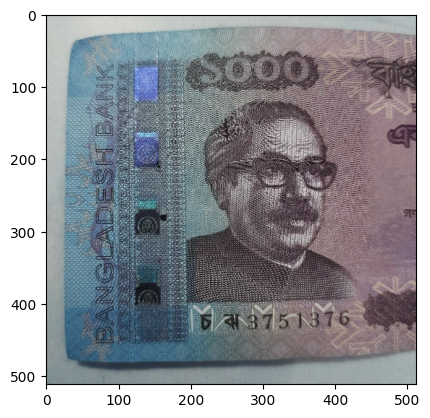

In [24]:
img = cv2.imread('/kaggle/input/currency/test/real/note_004_1_2eb815ccc15942c48ce5b3dd51746277.jpg')

plt.imshow(img)

In [52]:
pathh = "/kaggle/input/currency/test/real/note_004_1_2eb815ccc15942c48ce5b3dd51746277.jpg"
test_image = cv2.imread(pathh)
test_image = cv2.resize(test_image,(256,256))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_input = test_image.reshape((1,256,256,1))
(cnn_model.predict(test_input) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1]], dtype=int32)

**Model Evaluation**

**CNN MODEL**

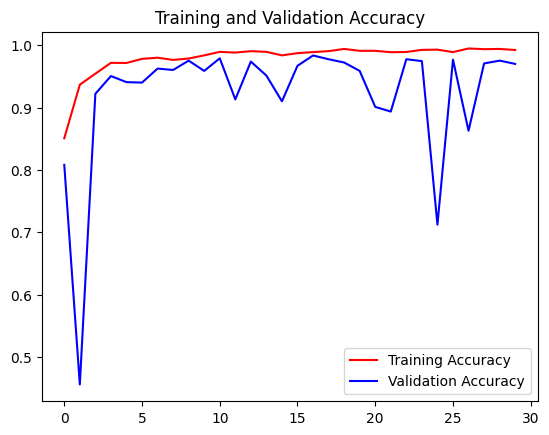

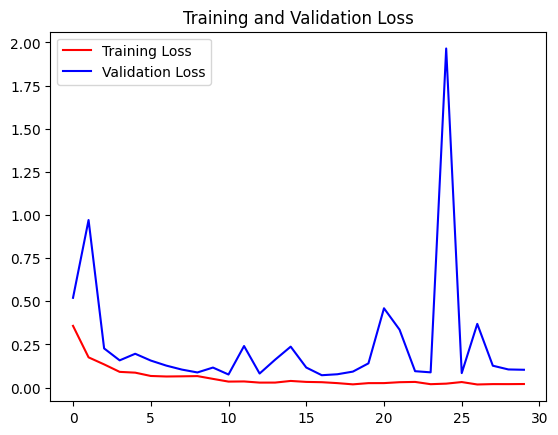

In [53]:
acc = cnn_model_history.history['accuracy']
val_acc = cnn_model_history.history['val_accuracy']
loss = cnn_model_history.history['loss']
val_loss = cnn_model_history.history['val_loss']

# Define the range of epochs
epochs = range(len(acc))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plots
plt.show()

Prediction for test_file

In [54]:
y_pred_cnn = (cnn_model.predict(test_ds) > 0.5).astype("int32")
y_pred_classes_cnn = (y_pred_cnn)

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step


Confusion matrix

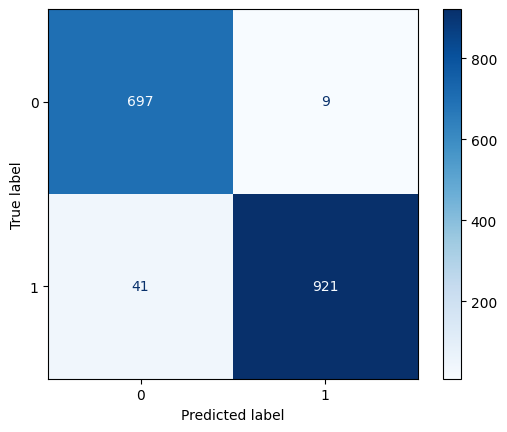

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes_cnn)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [56]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_pred_classes_cnn,target_names=[str(x) for x in np.unique(y_test)])

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       706
           1       0.99      0.96      0.97       962

    accuracy                           0.97      1668
   macro avg       0.97      0.97      0.97      1668
weighted avg       0.97      0.97      0.97      1668



In [57]:
count = 0
for i in range(len(y_test)):
    if(y_pred_classes_cnn[i]==y_test[i]):
        count += 1

accuracy = count / len(y_test)
print(f'Calculated Test Accuracy: {accuracy}')

Calculated Test Accuracy: 0.9700239808153477


# **Transfer Learning**

# **Alex Net**

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define input shape (assuming images are resized to 227x227 for AlexNet)
input_shape = (256, 256, 1)

In [13]:
def alexnet(input_shape):
    model = models.Sequential()

    # 1st Convolutional Layer
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), input_shape=input_shape, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

    # 2nd Convolutional Layer
    model.add(layers.Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

    # 3rd Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))

    # 4th Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))

    # 5th Convolutional Layer
    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

    # Flatten the output from the convolutional layers
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 2
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer (for binary classification, i.e., real or fake currency)
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


In [14]:
alexnet_model = alexnet(input_shape)

alexnet_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])


In [15]:
alexnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 96)     │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    67,112,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,623,745 (334.26 MB)

 Trainable params: 87,623,041 (334.26 MB)

 Non-trainable params: 704 (2.75 KB)

In [16]:
alexnet_history = alexnet_model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
  5/167 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4921 - loss: 43.0702

I0000 00:00:1729293319.229084     103 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads



167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6681 - loss: 5.3330

I0000 00:00:1729293332.746241     103 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads



167/167 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.6683 - loss: 5.3107 - val_accuracy: 0.6439 - val_loss: 0.6038
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.7457 - loss: 0.5177 - val_accuracy: 0.6979 - val_loss: 0.5714
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.7563 - loss: 0.4748 - val_accuracy: 0.8043 - val_loss: 0.4454
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.7895 - loss: 0.4462 - val_accuracy: 0.5412 - val_loss: 0.7047
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.7984 - loss: 0.4291 - val_accuracy: 0.8111 - val_loss: 0.4338
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.8320 - loss: 0.3954 - val_accuracy: 0.7894 - val_loss: 0.4644
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.8492 - loss: 0.3507 - val_accuracy: 0.7946 - val_loss: 0.4184
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8478 - loss: 0.3594 - val_accuracy: 0

In [70]:
loss, accuracy = alexnet_model.evaluate(test_ds)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9478 - loss: 0.2036
Validation Loss: 0.23311695456504822
Validation Accuracy: 0.9340527653694153


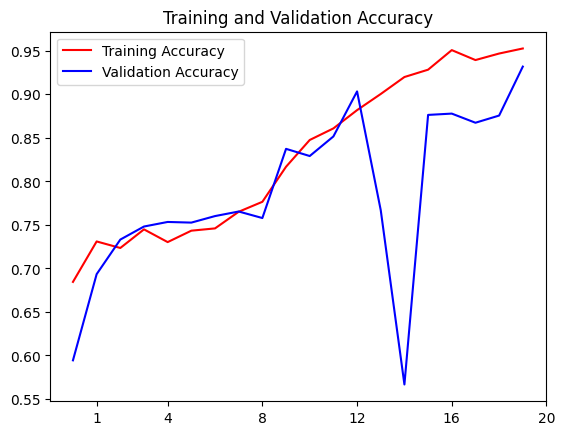

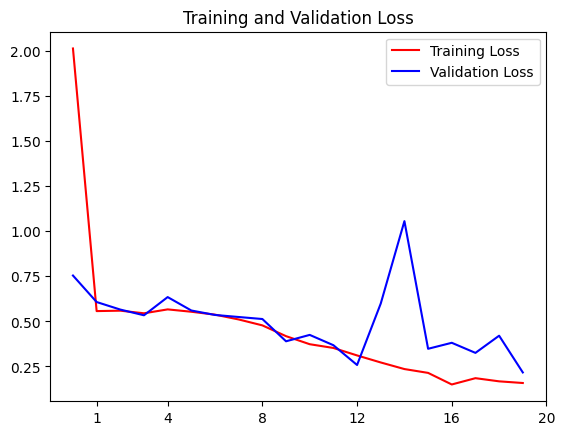

In [86]:
acc = alexnet_history.history['accuracy']
val_acc = alexnet_history.history['val_accuracy']
loss = alexnet_history.history['loss']
val_loss = alexnet_history.history['val_loss']

# Define the range of epochs
epochs = range(len(acc))
x_axis = [1,4,8,12,16,20]

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(x_axis)
plt.legend()
plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xticks(x_axis)
plt.legend()

# Show the plots
plt.show()

In [72]:
y_pred_alex = (alexnet_model.predict(test_ds) > 0.5).astype("int32")
y_pred_classes_alex = (y_pred_alex)

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


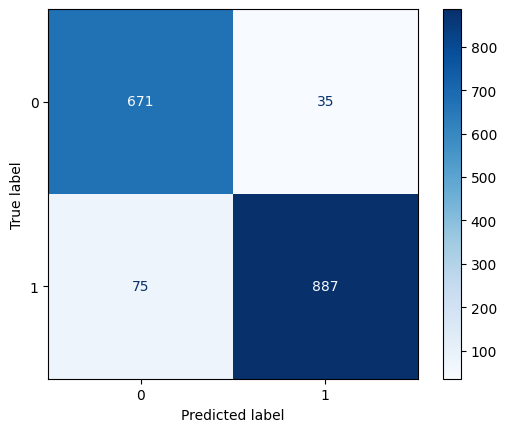

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes_alex)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [74]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_pred_classes_alex, target_names=[str(x) for x in np.unique(y_test)])

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       706
           1       0.96      0.92      0.94       962

    accuracy                           0.93      1668
   macro avg       0.93      0.94      0.93      1668
weighted avg       0.94      0.93      0.93      1668



# **Efficientnet**

In [17]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Define the input shape for grayscale images
input_shape = (256, 256, 1)  # (height, width, channels)

# Load EfficientNet model with weights pre-trained on ImageNet
# include_top=False to remove the final classification layer so we can customize it
efficient_net_base = EfficientNetB0(include_top=False, input_shape=(256, 256, 1), weights=None)

# Convert grayscale images to 3-channel by using Lambda layer
inputs = Input(shape=input_shape)
x = tf.keras.layers.Lambda(lambda x:(x))(inputs)

# Use the EfficientNet as the base model
x = efficient_net_base(x)

# Add custom classification head
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Regularization
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)  # Binary classification (fake/real)

# Define the complete model
efficient_net_model = Model(inputs, outputs)

# Compile the model
efficient_net_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
efficient_net_model.summary()

# Model is ready to be trained using your training data
# Assuming train_dataset and test_dataset are prepared
# model.fit(train_dataset, validation_data=test_dataset, epochs=10, batch_size=32)


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 8, 8, 1280)     │     4,048,991 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,088 (16.07 MB)

 Trainable params: 4,171,069 (15.91 MB)

 Non-trainable params: 42,019 (164.14 KB)

In [18]:
efficient_net_history = efficient_net_model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 176s 525ms/step - accuracy: 0.6325 - loss: 0.6964 - val_accuracy: 0.4055 - val_loss: 0.6943
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - accuracy: 0.8368 - loss: 0.3781 - val_accuracy: 0.5945 - val_loss: 0.7270
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - accuracy: 0.9197 - loss: 0.2398 - val_accuracy: 0.4055 - val_loss: 2.4208
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - accuracy: 0.9446 - loss: 0.1560 - val_accuracy: 0.7526 - val_loss: 0.5126
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - accuracy: 0.9563 - loss: 0.1228 - val_accuracy: 0.9288 - val_loss: 0.2093
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - accuracy: 0.9690 - loss: 0.0851 - val_accuracy: 0.8928 - val_loss: 0.3814
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 41s 149ms/step - accuracy: 0.9699 - loss: 0.0926 - val_accuracy: 0.9010 - val_loss: 0.3184
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - accuracy: 0.9759 - loss: 

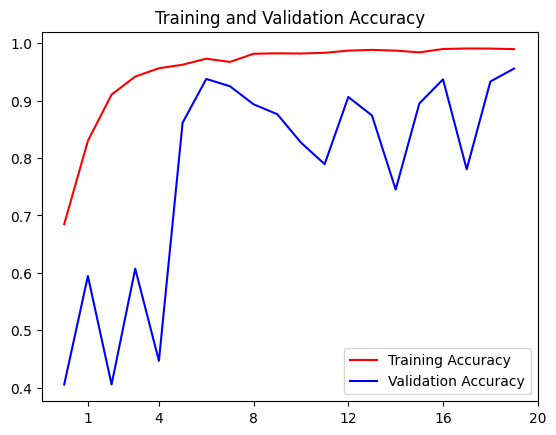

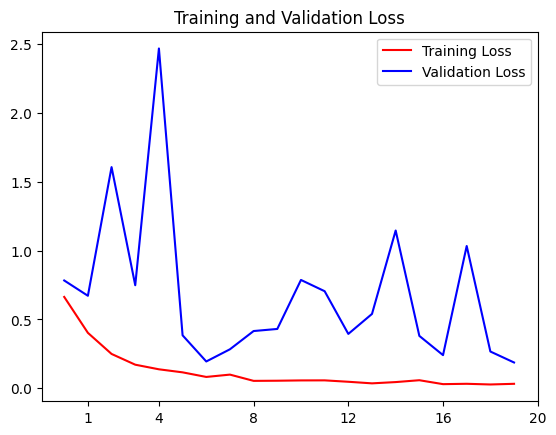

In [88]:
# Access the history attribute of the History object returned by model.fit
acc = efficient_net_history.history['accuracy']
val_acc = efficient_net_history.history['val_accuracy']
loss = efficient_net_history.history['loss']
val_loss = efficient_net_history.history['val_loss']

# Define the range of epochs
epochs = range(len(acc))
x_axis = [1,4,8,12,16,20]

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(x_axis)
plt.legend()
plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xticks(x_axis)
plt.legend()

# Show the plots
plt.show()

In [89]:
y_pred_efficient_net_model = (efficient_net_model.predict(test_ds) > 0.5).astype("int32")
y_pred_classes_efficient_net_model = (y_pred_efficient_net_model)

53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step


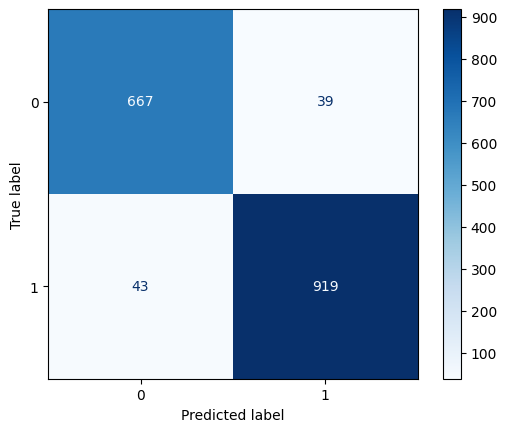

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes_efficient_net_model)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [92]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_pred_classes_efficient_net_model, target_names=[str(x) for x in np.unique(y_test)])

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       706
           1       0.96      0.96      0.96       962

    accuracy                           0.95      1668
   macro avg       0.95      0.95      0.95      1668
weighted avg       0.95      0.95      0.95      1668



# saving the models

In [19]:
def save_model(model ,file_path):
        model.model.save(file_path)
        return 'Model saved successfully'
save_model(cnn_model,file_path='cnn_model_new.h5')
alexnet_model.save('alex_net_model_new.h5')
efficient_net_model.save('efficient_net_model_new.h5')

# **Ensemble**

In [20]:
model_1 = load_model('/kaggle/working/cnn_model_new.h5')
model_2 = load_model('//kaggle/working/alex_net_model_new.h5')
model_3 = load_model('/kaggle/working/efficient_net_model_new.h5')
model_1.compile()
model_2.compile()
model_3.compile()

In [22]:
model_3.summary()

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 8, 8, 1280)     │     4,048,991 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,088 (16.07 MB)

 Trainable params: 4,171,069 (15.91 MB)

 Non-trainable params: 42,019 (164.14 KB)

In [23]:
# Add a Dense layer to model_2 to match the output shape of model_1
# Reduce the number of neurons in the Dense layer to avoid exceeding memory limits
model_2 = Model(inputs=model_2.inputs, outputs=Dense(1)(model_2.get_layer('dense_4').output))

model_3 = Model(inputs=model_3.inputs, outputs=model_3.get_layer('global_average_pooling2d').output)

models = [model_1 , model_2 ,model_3]
model_input = Input(shape=(256,256,1))
model_output = [model(model_input) for model in models]

ensemble_model = Average()(model_output)
ensemble_model = Model(inputs=model_input, outputs=ensemble_model)

In [24]:
ensemble_model.summary()

Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 1)         │ 14,848,385 │ input_layer_4[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_75       │ (None, 1)         │ 87,623,745 │ input_layer_4[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_77       │ (None, 1280)      │  4,048,991 │ input_layer_4[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average (Average)   │ (None, 1280)      │          0 │ sequential[0][0], │
│                     │                   │            │ functional_75[0]… │
│                     │                   │            │ functional_77[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 106,521,121 (406.35 MB)

 Trainable params: 106,477,566 (406.18 MB)

 Non-trainable params: 43,555 (170.14 KB)

In [25]:
ensemble_model = Model(inputs=ensemble_model.inputs, outputs=Dense(1, activation='sigmoid')(ensemble_model.output))

# Add this line to build the model
ensemble_model.build(input_shape=(None, 256,256,1))  # Replace 784 with your input shape

ensemble_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

ensemble_model_history = ensemble_model.fit(train_ds, validation_data=val_ds ,epochs=20)

Epoch 1/20


I0000 00:00:1729294550.723742     102 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_40', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_38', 4 bytes spill stores, 12 bytes spill loads



166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9783 - loss: 0.0000e+00

I0000 00:00:1729294654.460998     104 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_38', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_36', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion_2', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_28', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_71', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_25', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in functio

167/167 ━━━━━━━━━━━━━━━━━━━━ 220s 701ms/step - accuracy: 0.9784 - loss: 0.0000e+00 - val_accuracy: 0.9535 - val_loss: 0.0000e+00
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 56s 206ms/step - accuracy: 0.9907 - loss: 0.0000e+00 - val_accuracy: 0.8673 - val_loss: 0.0000e+00
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9882 - loss: 0.0000e+00 - val_accuracy: 0.9618 - val_loss: 0.0000e+00
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9948 - loss: 0.0000e+00 - val_accuracy: 0.9670 - val_loss: 0.0000e+00
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9961 - loss: 0.0000e+00 - val_accuracy: 0.9190 - val_loss: 0.0000e+00
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9941 - loss: 0.0000e+00 - val_accuracy: 0.9550 - val_loss: 0.0000e+00
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9962 - loss: 0.0000e+00 - val_accuracy: 0.9205 - val_loss: 0.0000e+00
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

new system ensemble


In [26]:
# Add a Dense layer to model_2 to match the output shape of model_1
# The output layer should have a sigmoid activation for binary classification
model_2 = Model(inputs=model_2.inputs, outputs=Dense(1, activation='sigmoid')(model_2.get_layer('dense_4').output))

# Global Average Pooling is a feature extractor; no need for a Dense layer yet
model_3 = Model(inputs=model_3.inputs, outputs=model_3.get_layer('global_average_pooling2d').output)

# List of models
models = [model_1, model_2, model_3]

# Input layer
model_input = Input(shape=(256, 256, 1))

# Collecting the outputs of each model
model_output = [model(model_input) for model in models]

# Average the outputs of all models
ensemble_output = Average()(model_output)

# Final output layer with sigmoid activation for binary classification
ensemble_output = Dense(1, activation='sigmoid')(ensemble_output)

# Final ensemble model
ensemble_model = Model(inputs=model_input, outputs=ensemble_output)


In [27]:
ensemble_model.summary()

Model: "functional_87"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 1)         │ 14,848,385 │ input_layer_5[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_83       │ (None, 1)         │ 87,623,745 │ input_layer_5[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_85       │ (None, 1280)      │  4,048,991 │ input_layer_5[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_1 (Average) │ (None, 1280)      │          0 │ sequential[1][0], │
│                     │                   │            │ functional_83[0]… │
│                     │                   │            │ functional_85[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │      1,281 │ average_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 106,522,402 (406.35 MB)

 Trainable params: 106,478,847 (406.18 MB)

 Non-trainable params: 43,555 (170.14 KB)

In [28]:
ensemble_model = Model(inputs=ensemble_model.inputs, outputs=Dense(1, activation='sigmoid')(ensemble_model.output))

# Add this line to build the model
ensemble_model.build(input_shape=(None, 256,256,1))  # Replace 784 with your input shape

ensemble_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

ensemble_model_history = ensemble_model.fit(train_ds, validation_data=val_ds ,epochs=20)

Epoch 1/20


I0000 00:00:1729295416.997269     102 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_39', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_37', 4 bytes spill stores, 12 bytes spill loads



166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8329 - loss: 0.0000e+00

I0000 00:00:1729295520.949785     104 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_37', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_35', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion_2', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_28', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_71', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_25', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in functio

167/167 ━━━━━━━━━━━━━━━━━━━━ 216s 695ms/step - accuracy: 0.8341 - loss: 0.0000e+00 - val_accuracy: 0.8553 - val_loss: 0.0000e+00
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9916 - loss: 0.0000e+00 - val_accuracy: 0.9483 - val_loss: 0.0000e+00
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 206ms/step - accuracy: 0.9952 - loss: 0.0000e+00 - val_accuracy: 0.8801 - val_loss: 0.0000e+00
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9947 - loss: 0.0000e+00 - val_accuracy: 0.9543 - val_loss: 0.0000e+00
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9930 - loss: 0.0000e+00 - val_accuracy: 0.8988 - val_loss: 0.0000e+00
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9932 - loss: 0.0000e+00 - val_accuracy: 0.9123 - val_loss: 0.0000e+00
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9891 - loss: 0.0000e+00 - val_accuracy: 0.7661 - val_loss: 0.0000e+00
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0]], dtype=int32)

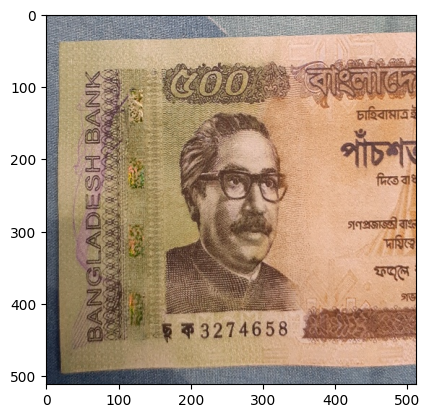

In [31]:
img = cv2.imread('/kaggle/input/currency/test/fake/note_003_1_6e7461fd2e9a48bd81fbd5c82f8dd499.jpg')

plt.imshow(img)
pathh = "/kaggle/input/currency/test/fake/note_003_1_6e7461fd2e9a48bd81fbd5c82f8dd499.jpg"
test_image = cv2.imread(pathh)
test_image = cv2.resize(test_image,(256,256))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_input = test_image.reshape((1,256,256,1))
(cnn_model.predict(test_input) > 0.5).astype("int32")

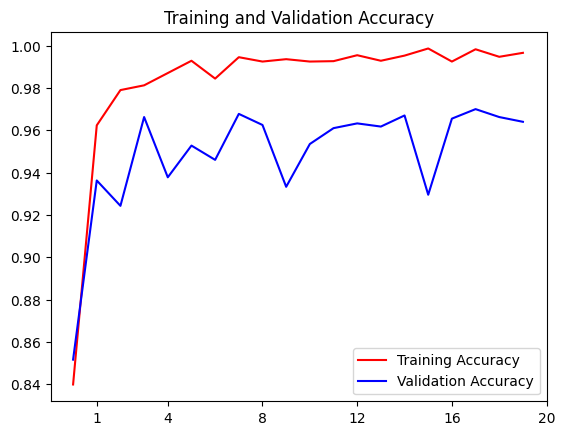

<Figure size 640x480 with 0 Axes>

In [121]:
# Access the history attribute of the History object returned by model.fit
acc = ensemble_model_history.history['accuracy']
val_acc = ensemble_model_history.history['val_accuracy']

# Define the range of epochs
epochs = range(len(acc))
x_axis = [1,4,8,12,16,20]

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(x_axis)
plt.legend()
plt.figure()

# Show the plots
plt.show()

In [103]:
y_pred_ensemble_model = (ensemble_model.predict(test_ds) > 0.5).astype("int32")
y_pred_classes_ensemble_model = (y_pred_ensemble_model)

53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step


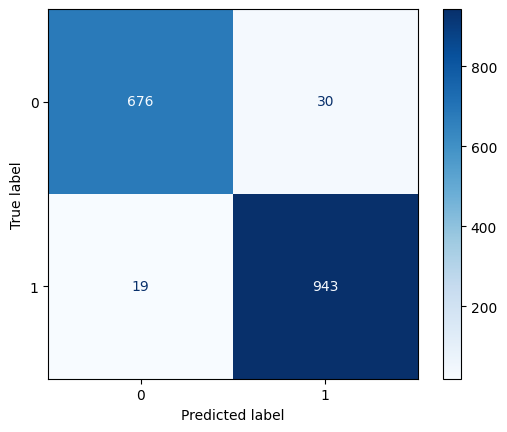

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes_ensemble_model)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [106]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_pred_classes_ensemble_model, target_names=[str(x) for x in np.unique(y_test)])

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       706
           1       0.97      0.98      0.97       962

    accuracy                           0.97      1668
   macro avg       0.97      0.97      0.97      1668
weighted avg       0.97      0.97      0.97      1668



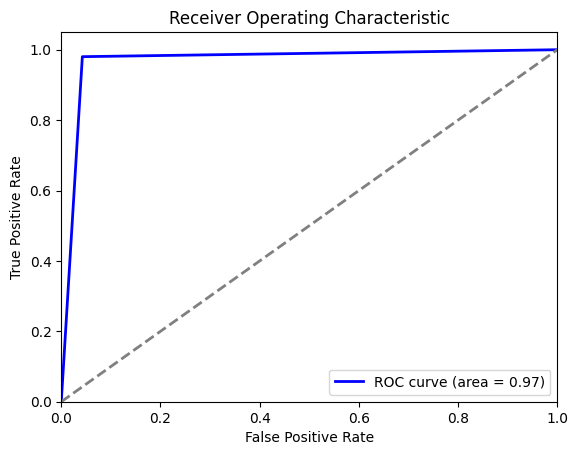

In [107]:
fpr, tpr, _ = roc_curve(y_test, y_pred_classes_ensemble_model)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

pRediction


In [115]:
ensemble_model.save_weights('final_model_weights.weights.h5')

In [118]:
import pickle
model_json = ensemble_model.to_json()
with open('final_model_architechture.pkl', 'wb') as f:
    pickle.dump(model_json, f)